In [25]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv(r"C:\HOC\khoaluan\final_data.csv")

In [27]:
df

,Loan Loss Provisions,Total Deposits Ratio,Non-Interest Expenses,Loan Loss Provisions Ratio,Cumulative Gaps Over Total Assets,Profits Before Tax,Target
0,2887292.375,0.068268,9.287076e+05,2.632933,31.937059,2.153334e+05,1.0
1,2887292.375,0.068268,6.501660e+05,2.632933,60.461667,2.737330e+05,1.0
2,37857.000,0.009918,4.455200e+04,1.996342,46.218506,5.342000e+03,1.0
3,650476.000,0.068268,4.447170e+05,2.220420,55.087241,3.289510e+05,1.0
4,13372.000,0.040645,1.351380e+05,0.342156,78.886473,1.646510e+05,0.0
...,...,...,...,...,...,...,...
609,2887292.375,0.021924,5.511766e+06,1.509858,61.588354,3.620859e+06,1.0
610,2400324.000,0.021140,6.120005e+06,1.191129,16.278227,5.363616e+06,0.0
611,2887292.375,0.038337,6.223097e+06,1.075502,73.473452,5.363616e+06,0.0
612,2887292.375,0.046856,6.223097e+06,2.408904,29.649680,5.363616e+06,0.0


In [28]:
df.dtypes

Loan Loss Provisions                 float64
Total Deposits Ratio                 float64
Non-Interest Expenses                float64
Loan Loss Provisions Ratio           float64
Cumulative Gaps Over Total Assets    float64
Profits Before Tax                   float64
Target                               float64
dtype: object

In [29]:
continuous_vars = []
for i in df.columns:
    if i == "Bank Code" or i == "Target":
        continue
    else:
        continuous_vars.append(i)

In [30]:
continuous_vars

['Loan Loss Provisions  ',
 'Total Deposits Ratio',
 'Non-Interest Expenses',
 'Loan Loss Provisions Ratio',
 'Cumulative Gaps Over Total Assets',
 'Profits Before Tax']

### Unvariate Analysis

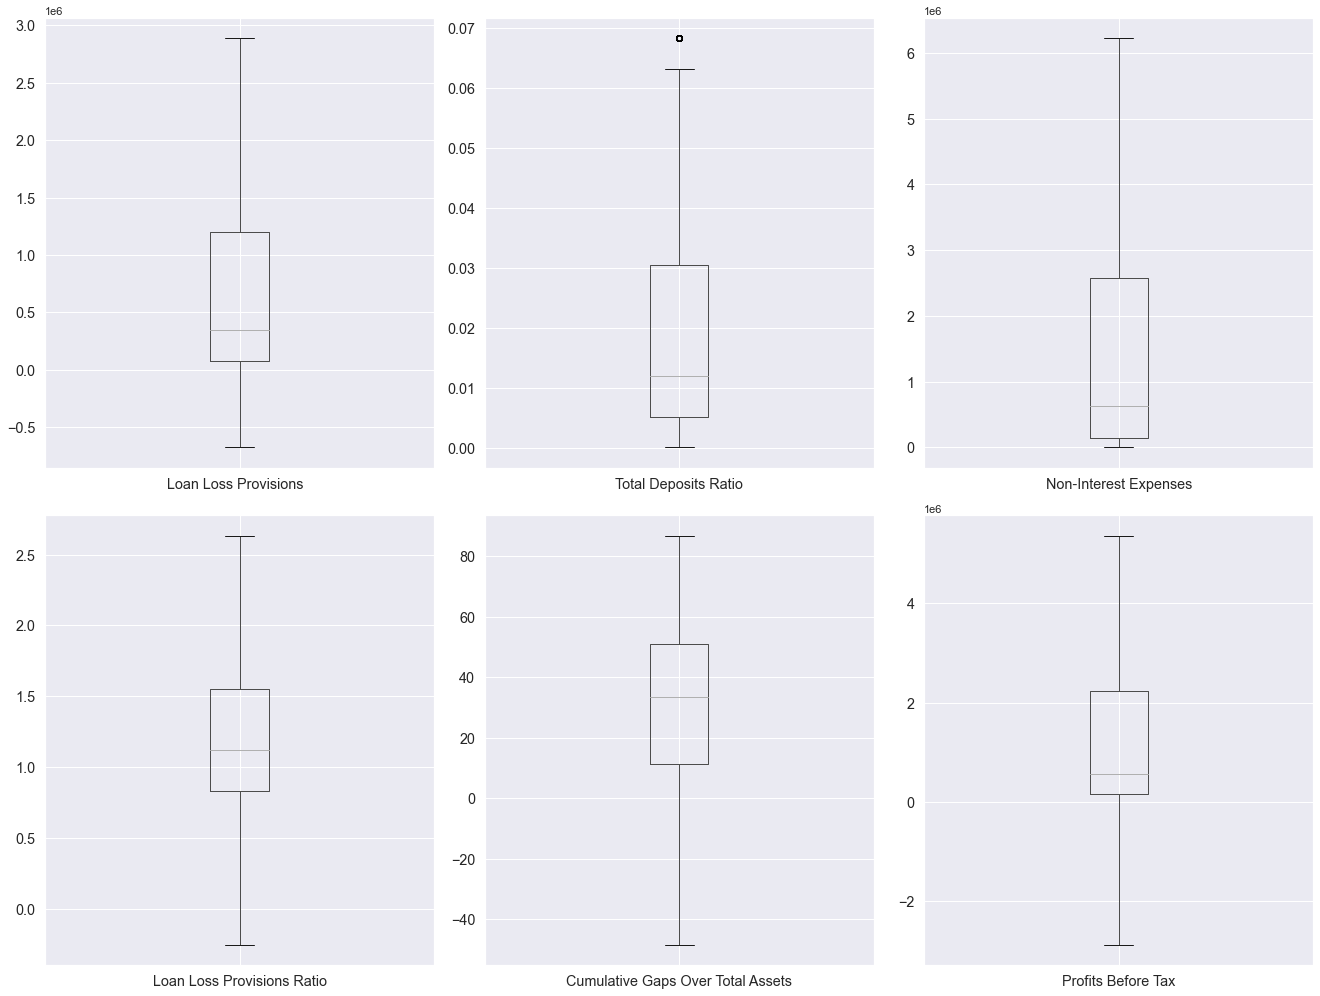

In [36]:
# Distribution
fig, axes = plt.subplots(2,3) # create figure and axes

for i, el in enumerate(list(df[continuous_vars].columns.values)):
  a = df.boxplot(el, ax=axes.flatten()[i], fontsize='large')

fig.set_size_inches(18.5, 14)
plt.tight_layout() 

plt.show()

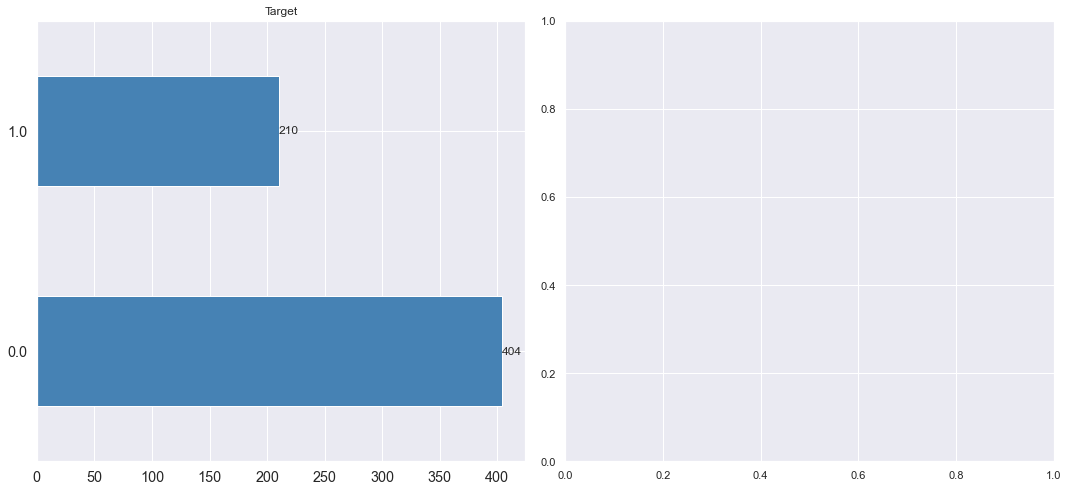

In [32]:
# Categories
categorical_vars = ["Target"]
fig, axes = plt.subplots(1, 2)  # create figure and axes

for i, el in enumerate(df[categorical_vars]):
    counts = df[el].value_counts()
    counts.plot(
        kind="barh",
        ax=axes.flatten()[i],
        fontsize='large',
        color='steelblue'
    ).set_title(el)

    # Add labels to the bars
    for j, count in enumerate(counts):
        axes.flatten()[i].text(count, j, str(count), ha='left', va='center')

fig.set_size_inches(15, 7)
plt.tight_layout()
plt.show()


### Bivariate data analysis

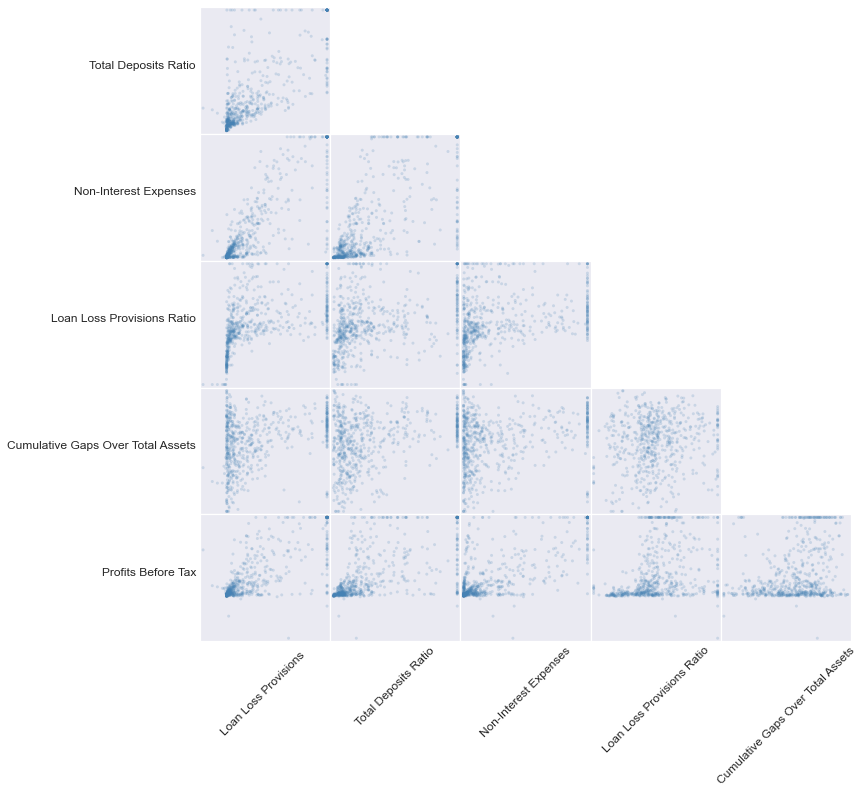

In [33]:
sm = pd.plotting.scatter_matrix(
    df[continuous_vars],
    color="steelblue", figsize=(14, 14), alpha=0.2
    )

# hiding ticks
for subaxis in sm:
  for ax in subaxis:
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# hiding one half of the matrix + the diagonal
for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i <= j:
            sm[i,j].set_visible(False)

pic = sm[0][0].get_figure()
pic.set_facecolor('white')

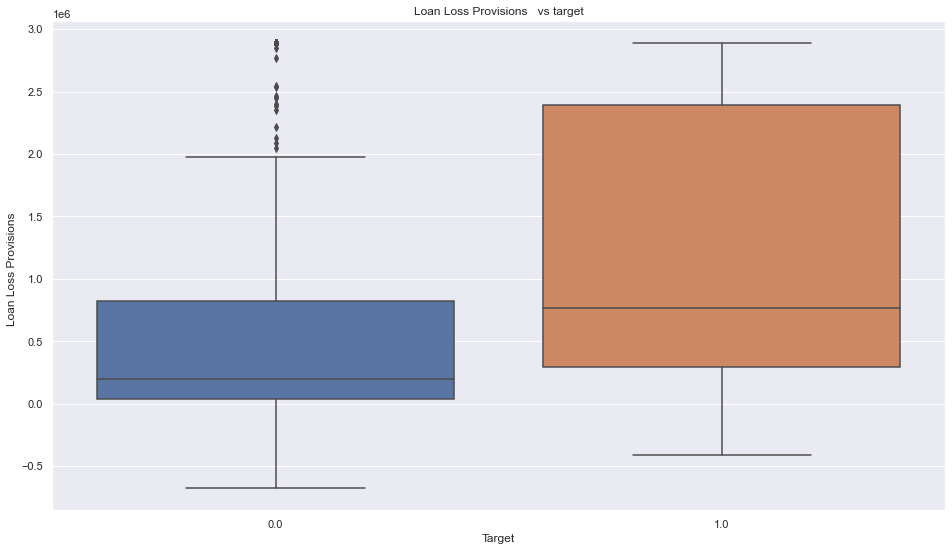

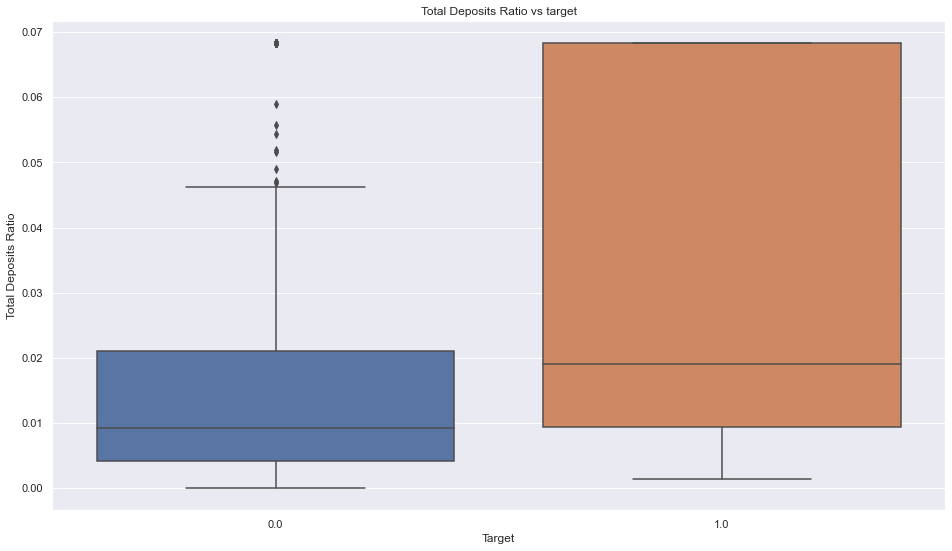

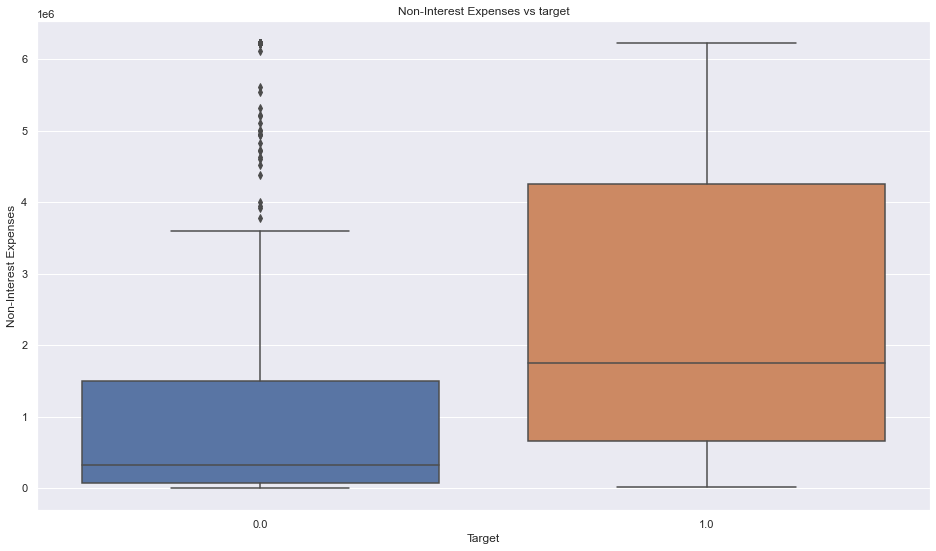

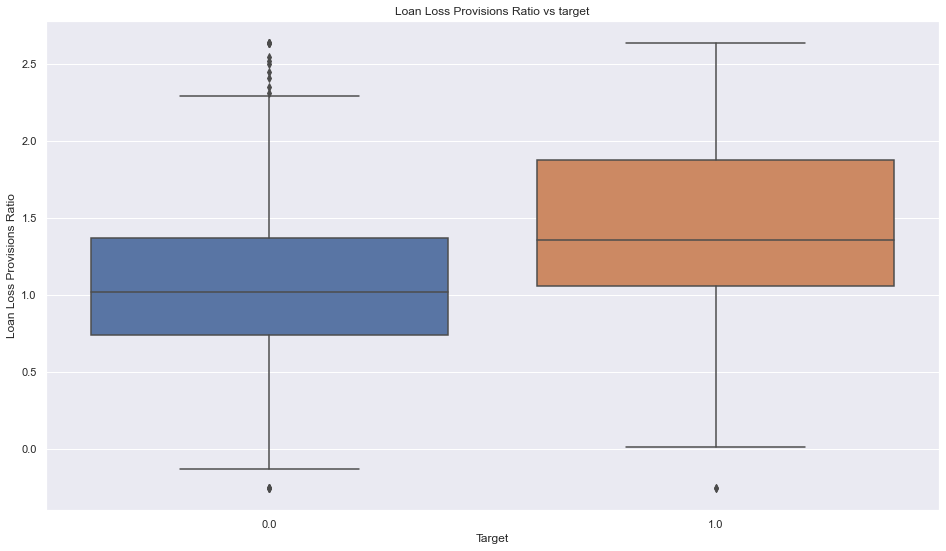

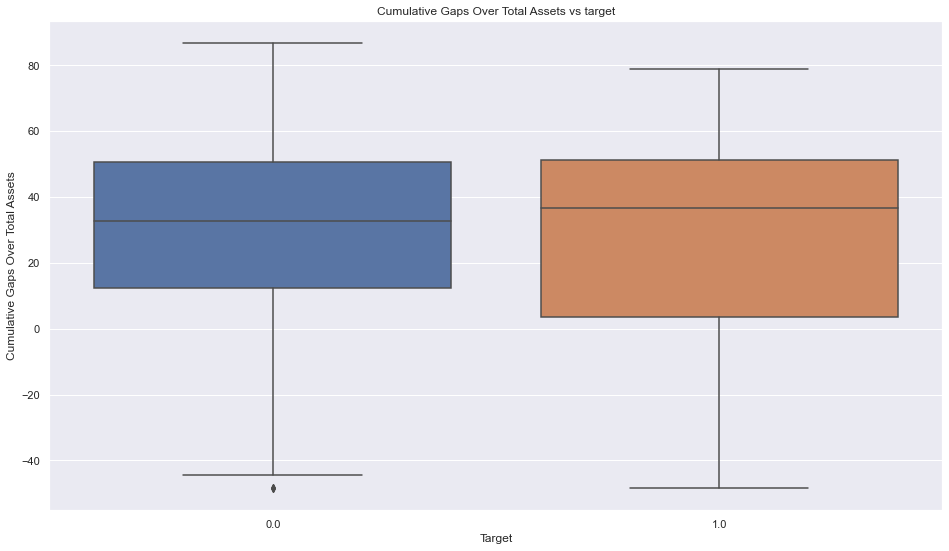

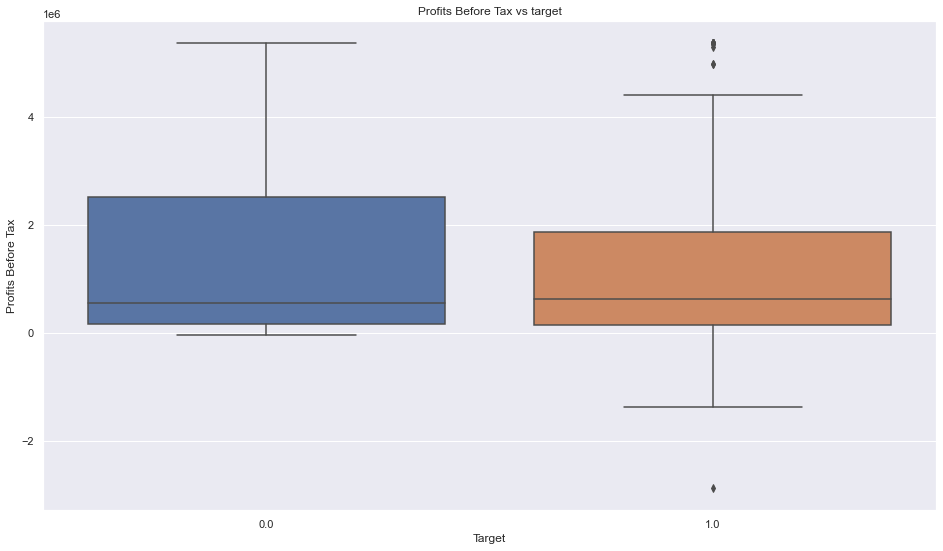

In [34]:
# plot each variable against the target variable
for col in df.columns[:-1]:
    sns.boxplot(x='Target', y=col, data=df)
    plt.title(col + " vs target")
    plt.show() 


### Insights and next steps